# `get_skewt_vars`

This notebook is a simple example of the GeoCAT-viz function <a href="../user_api/generated/geocat.viz.util.get_skewt_vars.html#geocat-viz.util.get_skewt_vars">get_skewt_vars</a>.

In [1]:
# Import packages:

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
from metpy.plots import SkewT
from metpy.units import units
import metpy.calc as mpcalc

import geocat.viz as gv
import geocat.datafiles as gdf

In [ ]:
# Read in data

# Open a ascii data file using pandas' read_csv function
ds = pd.read_csv(gdf.get('ascii_files/sounding.testdata'),
                 delimiter='\\s+',
                 header=None)

# Extract the data
p = ds[1].values * units.hPa  # Pressure [mb/hPa]
tc = (ds[5].values + 2) * units.degC  # Temperature [C]
tdc = ds[9].values * units.degC  # Dew pt temp  [C]

# Create dummy wind data
wspd = np.linspace(0, 150, len(p)) * units.knots  # Wind speed   [knots or m/s]
wdir = np.linspace(0, 360, len(p)) * units.degrees  # Meteorological wind dir
u, v = mpcalc.wind_components(wspd, wdir)  # Calculate wind components

# Generate subtitle with Pressure of LCL, Temperature of LCL, Showalter Index,
# Precipitable Water, and CAPE
tc0 = tc[0]  # Temperature of surface parcel
tdc0 = tdc[0]  # Dew point temperature of surface parcel
pro = mpcalc.parcel_profile(p, tc0, tdc0)  # Temperature profile of parcel
subtitle = gv.get_skewt_vars(p, tc, tdc, pro)  # Create subtitle

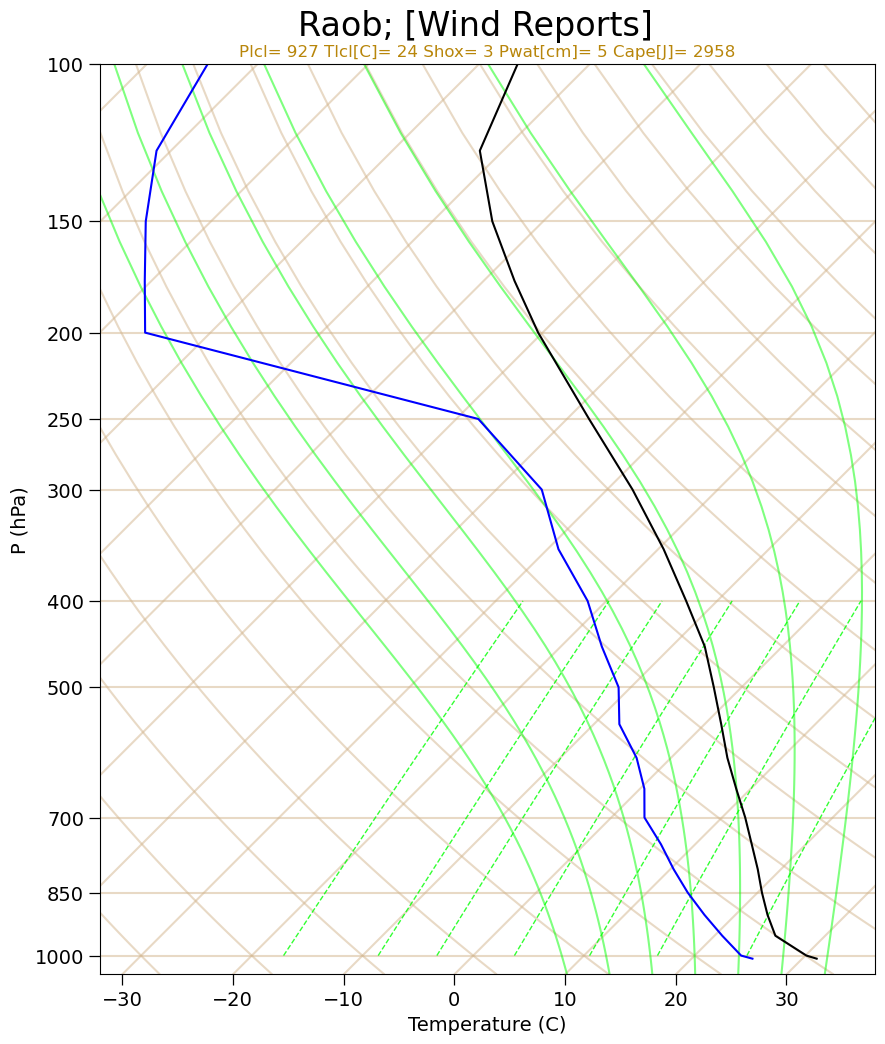

In [ ]:
# Create plot:

# Note that MetPy forces the x axis scale to be in Celsius and the y axis
# scale to be in hectoPascals. Once data is plotted, then the axes labels are
# automatically added
fig = plt.figure(figsize=(10, 12))

# The rotation keyword changes how skewed the temperature lines are. MetPy has
# a default skew of 30 degrees
skew = SkewT(fig, rotation=45)
ax = skew.ax

# Plot temperature and dew point
skew.plot(p, tc, color='black')
skew.plot(p, tdc, color='blue')


# Choose starting temperatures in Kelvin for the dry adiabats
t0 = units.K * np.arange(243.15, 444.15, 10)
skew.plot_dry_adiabats(t0=t0, linestyles='solid', colors='tan', linewidths=1.5)

# Choose starting temperatures in Kelvin for the moist adiabats
t0 = units.K * np.arange(281.15, 306.15, 4)
skew.plot_moist_adiabats(t0=t0,
                         linestyles='solid',
                         colors='lime',
                         linewidth=1.5)

# Choose mixing ratios
w = np.array([0.001, 0.002, 0.003, 0.005, 0.008, 0.012, 0.020]).reshape(-1, 1)

# Choose the range of pressures that the mixing ratio lines are drawn over
p_levs = units.hPa * np.linspace(1000, 400, 7)

# Plot mixing ratio lines
skew.plot_mixing_lines(mixing_ratio=w,
                       pressure=p_levs,
                       linestyle='dashed',
                       colors='lime',
                       linewidths=1)

# Use geocat.viz utility functions to set axes limits and ticks
gv.set_axes_limits_and_ticks(
    ax=ax,
    xlim=[-32, 38],
    yticks=[1000, 850, 700, 500, 400, 300, 250, 200, 150, 100])

# Use geocat.viz utility function to change the look of ticks and ticklabels
gv.add_major_minor_ticks(ax=ax,
                         x_minor_per_major=1,
                         y_minor_per_major=1,
                         labelsize=14)
# The utility function draws tickmarks all around the plot. We only need ticks
# on the left and bottom edges
ax.tick_params('both', which='both', top=False, right=False)

# Use geocat.viz utility functions to add labels
gv.set_titles_and_labels(ax=ax,
                         xlabel='Temperature (C)',
                         ylabel='P (hPa)',
                         labelfontsize=14)

# Manually add suptitle and subtitle for appropriate positioning
fig.suptitle('Raob; [Wind Reports]', fontsize=24, y=0.92)
ax.set_title(subtitle, color='darkgoldenrod')

# Change the style of the gridlines
plt.grid(True,
         which='major',
         axis='both',
         color='tan',
         linewidth=1.5,
         alpha=0.5)

plt.show();